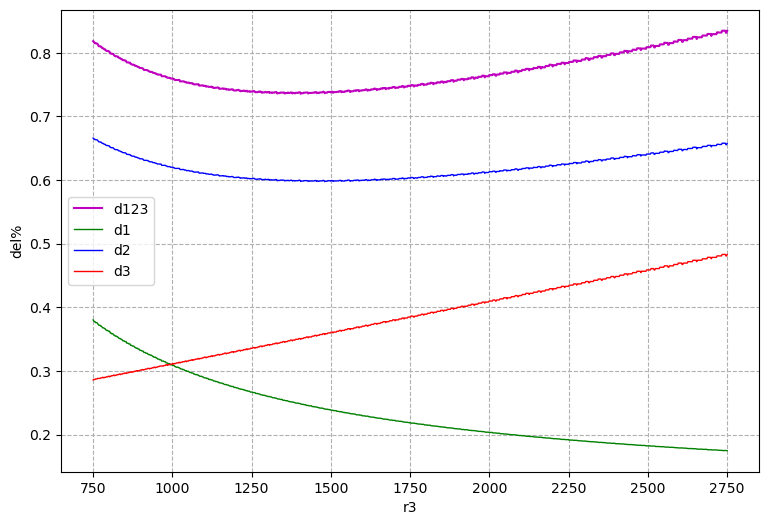

In [1]:
import numpy as np, matplotlib.pyplot as plt, csv, os, sys
vcc = 5.08      
b = 10.0            
maxA = 1023.0   
dd = 1.0          

rp = 26.09
r1 = 470.3
r2 = 993.7
r4 = 670.60

Rlo = 750.0
Rhi = 2750.0
n = 1000

def nodevolt(x, vcc): 
    rtot = rp+r1+r2+x+r4
    i = vcc/rtot
    v3 = i*(r4 + x + r2)
    v2 = i*(r4 + x)
    v1 = i*r4
    return v1,v2,v3

def convD(v,vcc,b):
    s = (1023.0)/vcc
    return int(np.clip(np.round(v*s),0,1023))

xs = np.linspace(Rlo, Rhi, n)

u1 = np.full_like(xs,np.nan,float)
u2 = np.full_like(xs,np.nan,float)
u3 = np.full_like(xs,np.nan,float)
u123 = np.full_like(xs,np.nan,float)

for i,x in enumerate(xs):
    v1,v2,v3=nodevolt(x,vcc)
    
    c1=convD(v1,vcc,b)
    c2=convD(v2,vcc,b)
    c3=convD(v3,vcc,b)

    d12=(c2-c1)
    d23=(c3-c2)

    t1 = (1.0/d12)*dd
    t2 = ((c3-c1)/(d23*d12))*dd
    t3 = (1.0 / d23)*dd

    u1[i] = t1*100.0
    u2[i] = t2*100.0
    u3[i] = t3*100.0
    u123[i] = np.sqrt(t1*t1+t2*t2+t3*t3)*100.0
    
plt.figure(figsize=(9,6))
plt.plot(xs, u123, 'm', lw=1.5, label='d123')
plt.plot(xs, u1, 'g', lw=1, label='d1')
plt.plot(xs, u2, 'b', lw=1, label='d2')
plt.plot(xs, u3, 'r', lw=1, label='d3')
plt.xlabel("r3")
plt.ylabel("del%")
plt.grid(True, linestyle='--', alpha=1)
plt.legend()
plt.show()

